In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def NCweights(m):
    """
    NCweights(m)
        m is an integer that satisfies 2 <= m <= 13.
        returns a numpy array consisting of the weights for the m-point Newton-Cotes rule.
    Based on Matlab code of Charles Van Loan from Introduction to Scientific Computing: A
    Matrix-Vector Approach Using Matlab.
    """
    if m==2:
        return np.array([1,1])/2
    elif m==3:
        return np.array([1,4,1])/6
    elif m==4:
        return np.array([1,3,3,1])/8
    elif m==5:
        return np.array([7,32,12,32,7])/90
    elif m==6:
        return np.array([19,75,50,50,75,19])/288
    elif m==7:
        return np.array([41,216,27,272,27,216,41])/840
    elif m==8:
        return np.array([751,3577,1323,2989,2989,1323,3577,751])/17280
    elif m==9:
        return np.array([989,5888,-928,10496,-4540,10496,-928,5888,989])/28350
    elif m==10:
        return np.array([2857,15741,1080,19344,5778,5778,19344,1080,15741,2857])/89600
    elif m==11:
        return np.array([16067,106300,-48525,272400,-260550,427368,-260550,272400,-48525,106300,16067])/598752
    # Additional
    elif m==12:
        return np.array([2171465,13486539,-3237113,25226685,-9595542,15493566,
                    15493566,-9595542,25226685,-3237113,13486539,2171465])/87091200
    elif m==13:
        return np.array([1364651,9903168,-7587864,35725120,-51491295,87516288,
                    -87797136,87516288,-51491295,35725120,-7587864,9903168,
                    1364651])/63063000
    else:
        return None

In [3]:
def QNC(f,a,b,m=3):
    t = np.linspace(a,b,m)
    return (b-a)*f(t).dot(NCweights(m))

In [4]:
def NCOpenWeights(m):
    """
    NCOpenWeights(m)

        returns a numpy array consisting of the weights for the m-point open
        Newton-Cotes rule.
        m is an integer that satisfies 1 <= m <= 11.
    Based on Matlab code of Charles Van Loan from Introduction to Scientific Computing: A
    Matrix-Vector Approach Using Matlab.
    """
    if m==1:
        return np.array([1])
    elif m==2:
        return np.array([1,1])/2
    elif m==3:
        return np.array([2,-1,2])/3
    elif m==4:
        return np.array([11,1,1,11])/24
    elif m==5:
        return np.array([11,-14,26,-14,11])/20
    elif m==6:
        return np.array([611,-453,562,562,-453,611])/1440
    elif m==7:
        return np.array([460,-954,2196,-2459,2196,-954,460])/945
    # Additional
    elif m==8:
        return np.array([1787,-2803,4967,-1711,-1711,4967,-2803,1787])/4480
    elif m==9:
        return np.array([4045,-11690,33340,-55070,67822,-55070,33340,-11690,4045])/9072
    elif m==10:
        return np.array([2752477,-6603199,15673880,-17085616,8891258,8891258,-17085616,
                         15673880,-6603199,2752477])/7257600
    elif m==11:
        return np.array([9626,-35771,123058,-266298,427956,-494042,427956,-266298,123058,
                         -35771,9626])/23100
    else:
        return None

In [5]:
def QNCOpen(f,a,b,m):
    x = np.linspace(a,b,m+2)[1:-1]
    w = NCOpenWeights(m)
    return (b-a)*f(x).dot(w)

In [6]:
def NCerror(a,b,m,M=1):
    """
    NCerror(a,b,m,M)
    The error bound for the m-point Newton Cotes rule when applied to
    the integral from a to b of a function f(x). It is assumed that
    a<=b and 2<=m<=13. M is an upper bound for the (d+1)-st derivative of the 
    function f(x) on [a,b] where d = m if m is odd, and m-1 if m is even. 
    Based on Matlab code of Charles Van Loan from Introduction to Scientific Computing: A
    Matrix-Vector Approach Using Matlab.
    """
    d = int(np.floor((m+1)/2)*2-1)
    if m==2:
        c = -1/12
    elif m==3:   
        c = -1/90
    elif m==4:   
        c = -3/80
    elif m==5:
        c = -8/945
    elif m==6:
        c = -275/12096
    elif m==7:
        c = -9/1400
    elif m==8:
        c = -8183/518400
    elif m==9:
        c = -2368/467775
    elif m==10:
        # c = -4671/394240
        c = -173/14620
    elif m==11:
        c = -673175/163459296
    # Additional
    elif m==12:
        c = -2224234463/237758976000
    elif m==13:
        c = -3012/875875
    h = (b-a)/(m-1)
    return abs(c*M*h**(d+2)),c,d

In [7]:
def NCOpenError(a,b,m,M=1):
    """
    NCerror(a,b,m,M)
    The error bound for the m-point Newton Cotes rule when applied to
    the integral from a to b of a function f(x). It is assumed that
    a<=b and 1<=m<=11. M is an upper bound for the (d+1)-st derivative of the 
    function f(x) on [a,b] where d = m if m is odd, and m-1 if m is even. 
    Based on Matlab code of Charles Van Loan from Introduction to Scientific Computing: A
    Matrix-Vector Approach Using Matlab.
    """
    d = int(np.floor((m+1)/2)*2-1)
    if m==1:
        c = 1/3
    elif m==2:
        c = 3/4
        # c = 1/4
    elif m==3:   
        # c = 28/90 # same
        c = 14/45
    elif m==4:   
        c = 95/144
    elif m==5:
        c = 41/140
    elif m==6:
        c = 5257/8640
    elif m==7:
        c = 3956/14175
    # Additional
    elif m==8:
        c = 25713/44800
    elif m==9:
        c = 80335/299376
    elif m==10:
        c = 4777223/8709120
    elif m==11:
        c = 1364651/5255250
    h = (b-a)/(m+1)
    return abs(c*M*h**(d+2)),c,d

In [5]:
def interpNrecursive(x,y):
    c = np.empty(x.size)
    c[0] = y[0]
    if x.size>1:
        c[1:] = interpNrecursive(x[1:],(y[1:]-y[0])/(x[1:]-x[0]))
    return c
def hornerN(t,x,c):
    result = c[-1]
    for xk,ck in zip(x[-2::-1],c[-2::-1]):
        result = result*(t-xk)+ck
    return result

In [6]:
a = 0.0
b = np.pi
def f(x):
    return np.sin(x)
t = np.linspace(a,b,1000)

In [19]:
m = 3
w = NCweights(m)
x = np.linspace(a,b,m)
est = (f(x)*w).sum()*(b-a)
est

2.0943951023931953

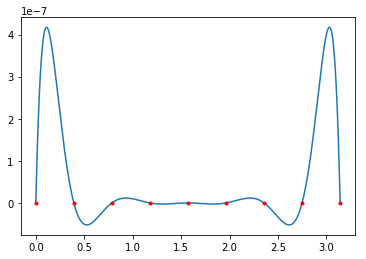

In [15]:
c = interpNrecursive(x,f(x))
plt.plot(t,f(t)-hornerN(t,x,c),x,np.zeros(x.size),'r.')

In [17]:
for m in range(2,14):
    w = NCweights(m)
    x = np.linspace(a,b,m)
    est = (f(x)*w).sum()*(b-a)
    print('%2d %10.3e' % (m,2-est))

 2  2.000e+00
 3 -9.440e-02
 4 -4.052e-02
 5  1.429e-03
 6  7.969e-04
 7 -1.781e-05
 8 -1.087e-05
 9  1.647e-07
10  1.052e-07
11 -1.147e-09
12 -7.528e-10
13  6.176e-12


In [18]:
(b-a)**5/(24*(120))

0.10625683499488937